<a href="https://colab.research.google.com/github/viktoruebelhart/uci_bank/blob/main/UCI_BANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These data are related to marketing campaigns, based on telephone calls, from a Portuguese banking institution. The goal is to understand, from this dataset, whether a client will subscribe to a term deposit (variable y) at the bank. The marketing campaigns were conducted via telephone calls. Often, more than one contact with the same client was required to determine whether the product (bank term deposit) would be acquired or not.

In [15]:
import pandas as pd

df = pd.read_csv('/content/UCI Machine Learning Repository - Bank.csv', sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
df.shape

(4521, 17)

age: The client’s age.

job: The client’s occupation/profession.

marital: The client’s marital status (e.g., single, married).

education: The client’s education level.

default: Indicates if the client has any outstanding credit in default.

balance: The client’s average bank account balance.

housing: Indicates if the client has a housing loan.

loan: Indicates if the client has a personal loan.

contact: The type of telephone contact (e.g., mobile, landline).

day: The day of the last phone contact.

month: The month of the last phone contact.

duration: The duration (in seconds) of the last phone contact.

campaign: The number of contacts performed during this campaign.

pdays: The number of days since the last contact from a previous campaign.

previous: The number of contacts made before this campaign.

poutcome: The result of the previous marketing campaign (e.g., success,
failure).

y: The target variable, indicating whether the client subscribed (yes/no) to a term deposit.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#Analysis of customer age distribution

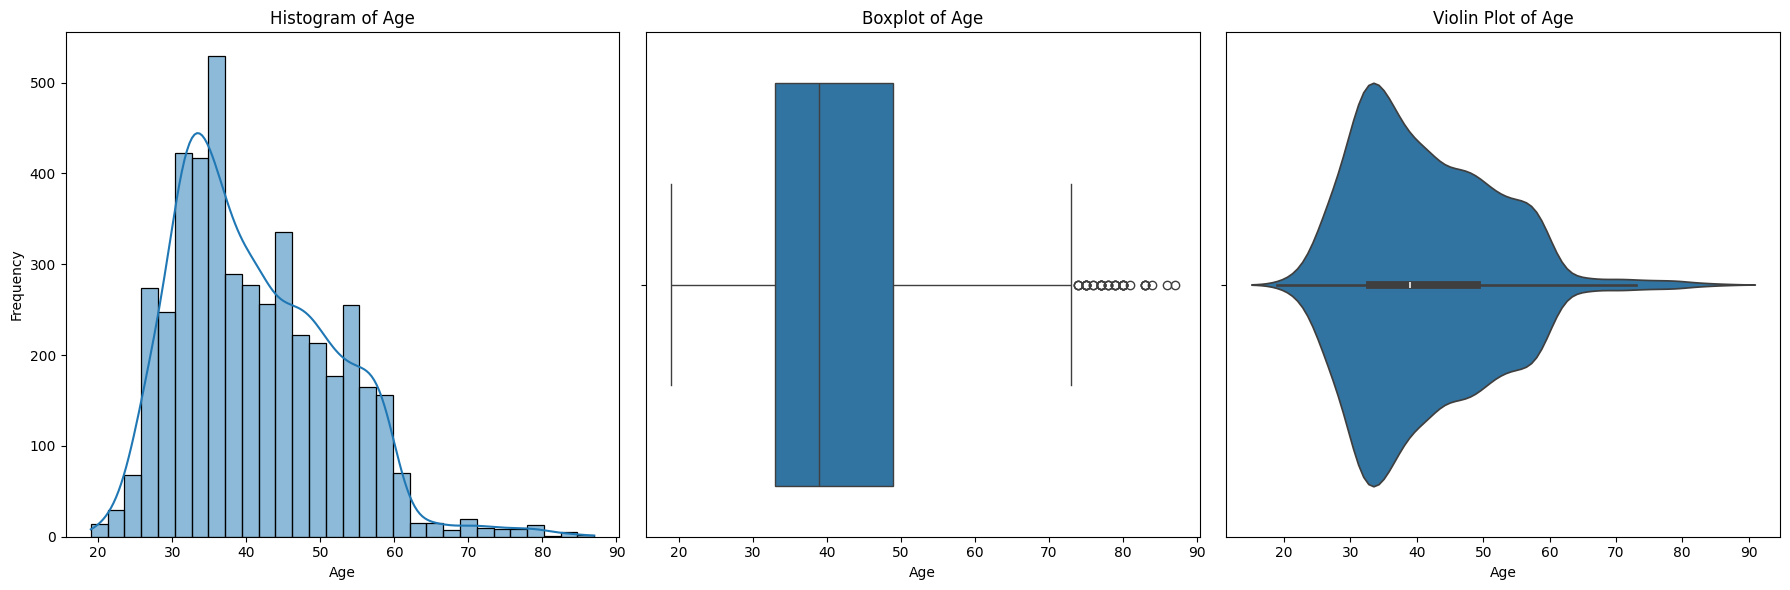

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')
axes[1].set_xlabel('Age')

# Violin plot
sns.violinplot(x=df['age'], ax=axes[2])
axes[2].set_title('Violin Plot of Age')
axes[2].set_xlabel('Age')

# Adjust spacing
plt.tight_layout()

# Display the plots
plt.show()

In [20]:
df['age'].describe()

,age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000


#Analysis of the distribution of client work

In [21]:
job_distribution = df['job'].value_counts()
job_distribution

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


In [22]:
job_percentage = df['job'].value_counts(normalize=True) * 100
job_percentage

,proportion
job,
management,21.433311
blue-collar,20.924574
technician,16.987392
admin.,10.572882
services,9.223623
retired,5.087370
self-employed,4.047777
entrepreneur,3.715992
unemployed,2.831232


In [23]:
# Creating a DataFrame for the job percentage distribution
job_percentage_df = job_percentage.reset_index()
job_percentage_df.columns = ['Job', 'Percentage']

display(job_percentage_df)

,Job,Percentage
0,management,21.433311
1,blue-collar,20.924574
2,technician,16.987392
3,admin.,10.572882
4,services,9.223623
5,retired,5.087370
6,self-employed,4.047777
7,entrepreneur,3.715992
8,unemployed,2.831232
9,housemaid,2.477328


#What are the main forms of contact with the bank?

In [26]:
df['contact'].value_counts()

,count
contact,
cellular,2896
unknown,1324
telephone,301


In [25]:
df['contact'].value_counts(normalize=True)*100

,proportion
contact,
cellular,64.056625
unknown,29.285556
telephone,6.657819


#Analysis of age in relation to balance

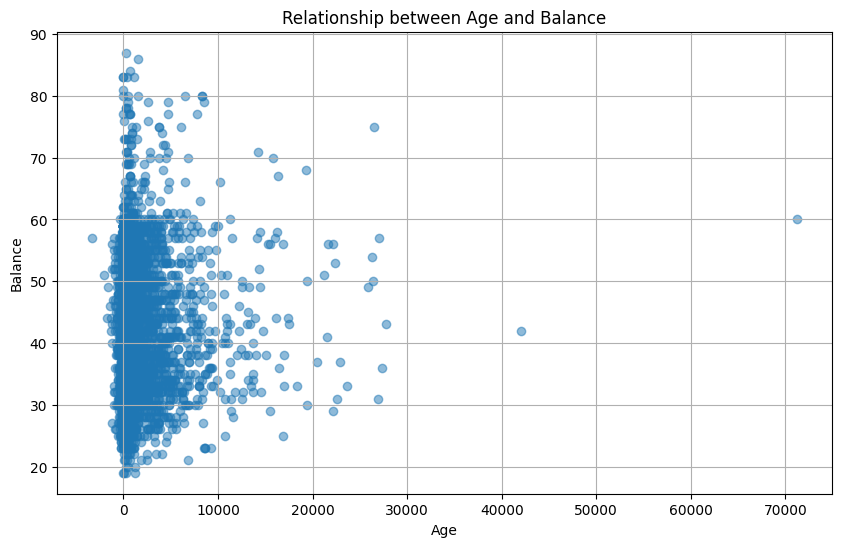

In [29]:
import matplotlib.pyplot as plt

# Scatter plot to analyze the relationship between age and balance
plt.figure(figsize=(10, 6))
plt.scatter(df['balance'], df['age'], alpha=0.5)
plt.title('Relationship between Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

In [30]:
df['balance'].describe()

,balance
count,4521.000000
mean,1422.657819
std,3009.638142
min,-3313.000000
25%,69.000000
50%,444.000000
75%,1480.000000
max,71188.000000


Text(0.5, 24.0, 'Balance')

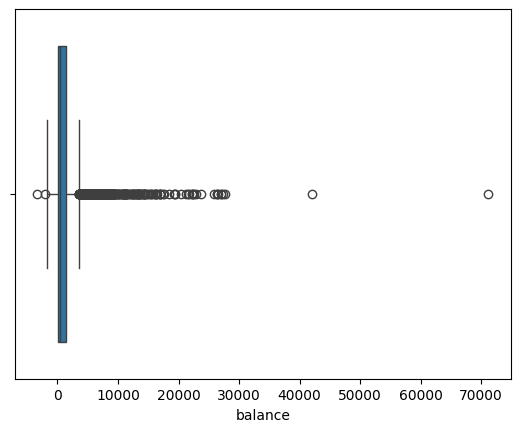

In [31]:
# Boxplot
sns.boxplot(x=df['balance'])
axes[1].set_title('Boxplot of Balance')
axes[1].set_xlabel('Balance')